<a href="https://colab.research.google.com/github/naskar002/Machine-Learning-Projects/blob/main/Spam_Mail_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
data.shape

(5572, 2)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham mail ---> 0
spam mail --->1

In [9]:
data.Category.value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

# Biased Dataset: Undersampling

In [16]:
ham_data = data[data['Category'] == 0].sample(n=747, random_state=1)
spam_data = data[data['Category'] == 1]


In [17]:
ham_data.shape

(747, 2)

In [18]:
ham_data['Category'].value_counts()

Category
0    747
Name: count, dtype: int64

In [19]:
new_dataset = pd.concat([ham_data, spam_data], axis=0)
new_dataset.head()

,Category,Message
2535,0,Ok enjoy . R u there in home.
1213,0,"Yo, the game almost over? Want to go to walmar..."
522,0,Shall i come to get pickle
5398,0,Hi. Hope you had a good day. Have a better night.
700,0,K..u also dont msg or reply to his msg..


In [20]:
X = new_dataset['Message']
y = new_dataset['Category']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,random_state=1)

In [22]:
y_train.value_counts()

Category
0    598
1    597
Name: count, dtype: int64

In [23]:
y_test.value_counts()

Category
1    150
0    149
Name: count, dtype: int64

In [28]:
X_train

4647    We tried to contact you re your reply to our o...
312     Think ur smart ? Win £200 this week in our wee...
1594    PRIVATE! Your 2003 Account Statement for shows...
3950    HMM yeah if your not too grooved out! And im l...
260     I‘m parked next to a MINI!!!! When are you com...
                              ...                        
4031                         Cool, I'll text you in a few
2123                         Do you know when the result.
5107    I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...
2627        Unni thank you dear for the recharge..Rakhesh
225     500 New Mobiles from 2004, MUST GO! Txt: NOKIA...
Name: Message, Length: 1195, dtype: object

In [29]:
type(X_train)

pandas.core.series.Series

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_ft = tfidf.fit_transform(X_train)
X_test_ft = tfidf.transform(X_test)


In [32]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Logistics Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_ft, y_train)

LogisticRegression()

Make prediction for test data and train data

In [34]:
X_train_predication = model.predict(X_train_ft)
X_test_predication = model.predict(X_test_ft)

Accuracy testing

In [35]:
from sklearn.metrics import accuracy_score
X_train_accuracy = accuracy_score(X_train_predication, y_train)
X_test_accuracy = accuracy_score(X_test_predication, y_test)
print('Accuracy on training data : ', X_train_accuracy)
print('Accuracy on test data : ', X_test_accuracy)

Accuracy on training data :  0.9815899581589959
Accuracy on test data :  0.9531772575250836


<Axes: >

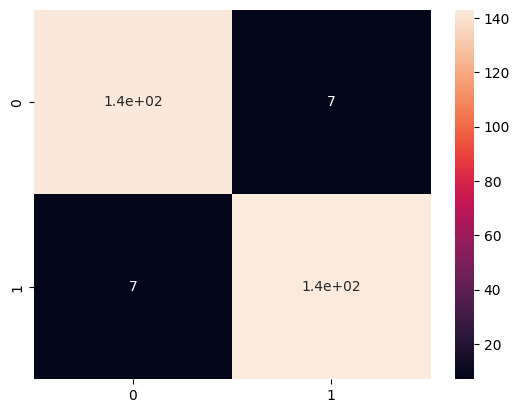

In [36]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_test_predication)
sns.heatmap(cm, annot=True)

# Building a predictive system

In [41]:
input = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C'
]
input_ft = tfidf.transform(input)
prediction = model.predict(input_ft)
print(prediction)
if (prediction[0]==1):
  print('Spam')
else:
  print('Ham')

[1]
Spam
